<a href="https://colab.research.google.com/github/LoganReyn/ClassProject/blob/main/RiceClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rice Image Classification

ARTI 450: Deep Learning

Cody & Logan

Professor Gogolin

Fall 2024

## Introduction


The goal of this project is to develop a Convolutional Neural Network (CNN) model for classifying rice grains into one of five distinct categories: Ipsala, Jasmine, Arborio, Karacadag, and Basmati. A secondary goal of the project is to learn the architecture and best practices of CNN's in image classification.

### Citations

Koklu, M., Cinar, I., & Taspinar, Y. S. (2021). Classification of rice varieties with deep learning methods. Computers and Electronics in Agriculture, 187, 106285. https://doi.org/10.1016/j.compag.2021.106285

Cinar, I., & Koklu, M. (2021). Determination of Effective and Specific Physical Features of Rice Varieties by Computer Vision In Exterior Quality Inspection. Selcuk Journal of Agriculture and Food Sciences, 35(3), 229-243. https://doi.org/10.15316/SJAFS.2021.252

Cinar, I., & Koklu, M. (2022). Identification of Rice Varieties Using Machine Learning Algorithms. Journal of Agricultural Sciences https://doi.org/10.15832/ankutbd.862482

Cinar, I., & Koklu, M. (2019). Classification of Rice Varieties Using Artificial Intelligence Methods. International Journal of Intelligent Systems and Applications in Engineering, 7(3), 188-194. https://doi.org/10.18201/ijisae.2019355381

[DATASET LINK](https://www.muratkoklu.com/s/)

## Formating Data

The zipped folder downloaded contains five subfolders, each corresponding to a specific type of rice: Ipsala, Jasmine, Arborio, Karacadag, and Basmati. Each subfolder contains numerous images of the respective rice type. To prepare these images for classification, the first step is to extract and organize them into a single, unified dataset. This involves labeling the images according to their rice type based on the subfolder they originated from. Once labeled, the images will be combined into one dataset and then partitioned into training, and test sets.

In [ ]:
# allow access to drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
from sklearn.model_selection import train_test_split

In [ ]:
# extract the zip file to cwd '/content'

ZIPPED = "/content/drive/My Drive/Colab Notebooks/Project Rice/RiceArchive.zip"

zipfile.ZipFile(ZIPPED).extractall(path='/content')

Should extract a folder "Rice_Image_Dataset" to cwd.

In [ ]:
os.listdir()

['.config', 'drive', 'Rice_Image_Dataset', 'sample_data']

In [ ]:
UNZIPED = '/content/Rice_Image_Dataset'
os.listdir(UNZIPED)

['Karacadag', 'Jasmine', 'Ipsala', 'Arborio', 'Basmati']

5 Folders each containing images of their respected rice type.

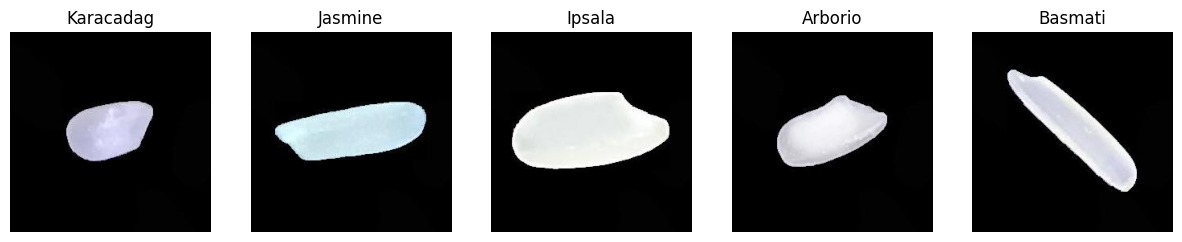

In [ ]:
folders = os.listdir(UNZIPED)

# Create a figure to display the images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# Display an example image from each folder
for i, folder in enumerate(folders):
    # Get a list of image files in the folder
    image_files = os.listdir(os.path.join(UNZIPED, folder))
    # Select a random image file
    image_file = random.choice(image_files)
    # Load the image
    img = mpimg.imread(os.path.join(UNZIPED, folder, image_file))
    # Display the image
    axes[i].imshow(img)
    axes[i].set_title(folder)
    axes[i].axis('off')

plt.show()

There are 5 types of rice in this image folder.
* Ipsala
* Jasmine
* Arborio
* Karacadag
* Basmati.

If you look closely, each rice type has a different color tint. Since we don't have good compute resources, we will turn the images black and white. If this wasn't the case, RGB would allow for much higher accuracy.

In [ ]:
# Images in each class

for folder in folders:
  print(f"{folder}: {len(os.listdir(os.path.join(UNZIPED, folder)))}")

Karacadag: 15000
Jasmine: 15000
Ipsala: 15000
Arborio: 15000
Basmati: 15000


There is 15,000 images of each class.

## Loading DataFrame

*There was much struggle with figuring out a solution to conserve the system RAM so Colab wouldn't crash when reading images from folder.*

**Failed Solutions**



*   Store data in dictionaries
*   Store data in lists
*   Batch Process Folders and Store each to Disk using the to csv method from pandas (data format got messed up everytime)

**Working Solution**

* Create dataframe of each folder using a generator. Create list of dataframes and then combine dataframes.


**Notes**

*  Attempting to standardize the pixel values uses lots of RAM
* Perhaps the problem was in the standardization calculations all along




In [ ]:
def dataFrameOfFolder(folders) -> pd.DataFrame:
  """ Generator of dataframe for each folder. """
  for folder in folders:
    imData = []
    labelData = []
    print(f"Doing {folder}")
    imageFolder = os.listdir(os.path.join(UNZIPED, folder))

    for image in imageFolder:
      # read as black and white
      img = cv2.imread((os.path.join(UNZIPED, folder, image)), cv2.IMREAD_GRAYSCALE)
      scaledImg = cv2.resize(img, (50, 50), interpolation=cv2.INTER_AREA)
      imData.append(scaledImg)
      labelData.append(folder)
    df = pd.DataFrame({"Image": imData, "Label": labelData})
    yield (df)

In [ ]:
# storing all dataframes of each rice type in list

riceFrames = []

for content in dataFrameOfFolder(folders):
  riceFrames.append(content)

Doing Karacadag
Doing Jasmine
Doing Ipsala
Doing Arborio
Doing Basmati


In [ ]:
# concat of all dataframes extracted

masterDf = pd.DataFrame()

for df in riceFrames:
    masterDf = pd.concat([masterDf, df], ignore_index=True)

In [ ]:
""" Dictionary for encoding labels """

labelDict = {
    'Ipsala': 0,
    'Jasmine': 1,
    'Arborio': 2,
    'Karacadag': 3,
    'Basmati': 4
}

encodeLabel = lambda label: labelDict[label] # -> int

# test
print(encodeLabel('Arborio'))

2


In [ ]:
import gc

In [ ]:
# clear up space
del (df)
del (content)
del (riceFrames)
del (image_files)

In [ ]:
# Label Encoding
masterDf['Label'] = masterDf['Label'].apply(lambda row: encodeLabel(row))

In [ ]:
# taking a peep

masterDf.sample(10)

,Image,Label
6409,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3
42411,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
19066,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
34778,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
54015,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2
20552,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
51764,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2
30828,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
60162,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4
21995,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1


In [ ]:
masterDf["Image"] = masterDf["Image"].apply(lambda row: np.stack(row, axis=0))

## Model Prep



*   Exporting the dataframe as is to csv doens't work as the image data gets cut off.
*   Setting up the image data to the proper format has yet to work



In [ ]:
X = masterDf['Image'].tolist()  # Convert image data column to a list
y = masterDf['Label']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

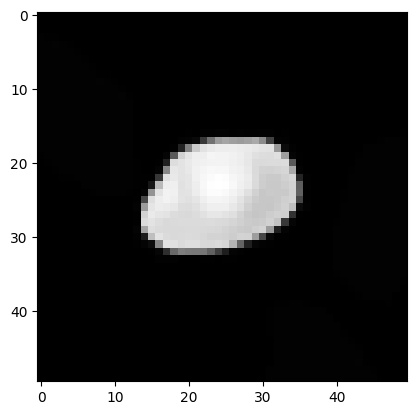

In [ ]:
plt.imshow(X_train[0], cmap='gray')

Looks like jasmine

In [ ]:
# Training class split

y_train.value_counts()

,count
Label,
4,12071
1,12005
2,12004
3,12003
0,11917


In [ ]:
# reshaping

X_train = np.stack(X_train, axis=0)
X_test = np.stack(X_test, axis=0)

In [ ]:
# adding the extra channel is for the intensity of light since black and white

X_train = X_train.reshape(X_train.shape[0], 50, 50, 1)
X_test = X_test.reshape(X_test.shape[0], 50, 50, 1)

In [ ]:
# making sure everything is a-ok
X_train.shape

(60000, 50, 50, 1)

In [ ]:
# Pixel Values Before: [0 - 255]

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Pixel Values After: [0 - 1]

## Model Build

*Somethings to note*

* **Keras** is a high-level API built on top of **TensorFlow** (and other backends). It simplifies the process of building and training neural networks by providing intuitive and user-friendly abstractions.



* For Input (batch_size, height, width, channels)
* When you specify input_shape=(50, 50, 1) in Keras (without the batch size), the model automatically handles the batching during training.



**tensorflow.keras.layers**

*necessary parameter notes*

Conv2D (filters, (kernal_height, kernal_width), activation, input_shape) \
MaxPooling2D((pool_height, pool_width)) \
Flatten(): Converts 3D to 1D\
Dense(neurons, activation) \





**Why Increase Filters in Later Layers?**
Typically, in deep CNNs, the number of filters is increased in deeper layers (e.g., going from 32 to 64 or 128) because:
*  As the spatial dimensions decrease (due to max pooling or strides), the network learns more abstract features and can benefit from learning a larger variety of feature representations.

* Increasing the number of filters allows the network to capture more detailed and varied features, which can improve performance in complex tasks like image classification.

[Resouce to Better Understand CNN's](https://poloclub.github.io/cnn-explainer/)

In [ ]:
import tensorflow as tf

tf.keras.backend.clear_session()

In [ ]:

# input image
WIDTH = 50
HEIGHT = 50


model = tf.keras.models.Sequential([

    # Layer 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(WIDTH, HEIGHT, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),

    # Layer 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),  # Further downsampling

    # Layer 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),  # Even further downsampling

    # n-D to 1D transformation
    tf.keras.layers.Flatten(),

    # Fully Connected Layer
    tf.keras.layers.Dense(128, activation='relu'),

    # Output Layer
    tf.keras.layers.Dense(5, activation='softmax')   # 5 classes, this is the output
    ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Could add . . .


*   Dropout: improves generalization
*   RGB: (current 50x50x1) 50x50x3 < 250x250x1
* ...



In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# needs to be one hot encoded when using 'categorical_crossentropy'

y_train_hot = tf.keras.utils.to_categorical(y_train, num_classes=5)
y_test_hot = tf.keras.utils.to_categorical(y_test, num_classes=5)

In [ ]:
EPOCHS = 10

history = model.fit(X_train, y_train_hot, epochs=EPOCHS)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 285s 151ms/step - accuracy: 0.9015 - loss: 0.2611
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 286s 153ms/step - accuracy: 0.9663 - loss: 0.1002
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 288s 154ms/step - accuracy: 0.9728 - loss: 0.0805
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 325s 155ms/step - accuracy: 0.9787 - loss: 0.0627
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 315s 152ms/step - accuracy: 0.9837 - loss: 0.0486
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 328s 155ms/step - accuracy: 0.9854 - loss: 0.0425
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 318s 153ms/step - accuracy: 0.9876 - loss: 0.0342
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 323s 153ms/step - accuracy: 0.9892 - loss: 0.0317
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 321s 153ms/step - accuracy: 0.9902 - loss: 0.0276
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 285s 152ms/step - accuracy: 0.9906 - loss: 0.0263


In [ ]:
# Results on test partition

test_loss, test_acc = model.evaluate(X_test, y_test_hot, verbose=2)

469/469 - 18s - 38ms/step - accuracy: 0.9873 - loss: 0.0368


98% accuracy on the test. How wonderful!

In [ ]:
history.history

{'accuracy': [0.947516679763794,
  0.9684833288192749,
  0.9738333225250244,
  0.9792333245277405,
  0.9842666387557983,
  0.9856333136558533,
  0.9870166778564453,
  0.9889000058174133,
  0.9901000261306763,
  0.9907833337783813],
 'loss': [0.14936946332454681,
  0.09343688935041428,
  0.0773552656173706,
  0.06083254888653755,
  0.047188740223646164,
  0.04175828397274017,
  0.03690795972943306,
  0.03195543214678764,
  0.028750823810696602,
  0.02714298665523529]}

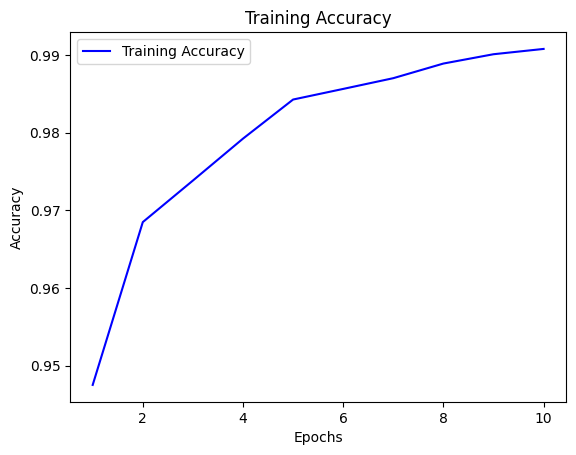

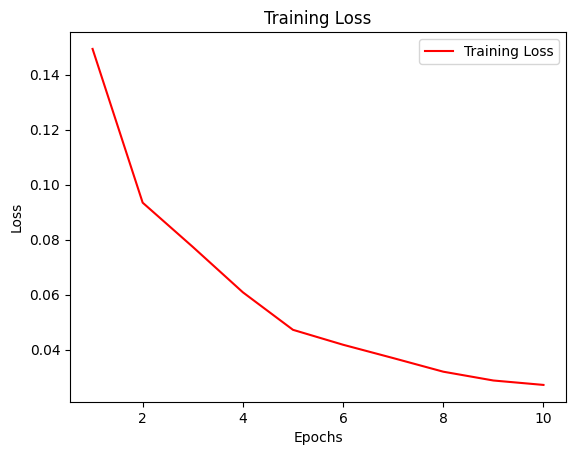

In [ ]:
# Visual over epochs

epochs = range(1, len(history.history['accuracy']) + 1)

# ACCURACY
plt.plot(epochs, history.history['accuracy'], 'b', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()  # Create a new figure for loss plot

# LOSS
plt.plot(epochs, history.history['loss'], 'r', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Model got better over the epochs with accuracy and loss. Test accuracy and train accuracy differences minimal. This model is good.

## Conclusion

Overall, this Convolutional Neural Network (CNN) did exceptionally well in classifying the 5 different types of Rice. These results were surprising as we thought much information would be lost when downscaling the images. The images were originally 250 by 250 pixels. The rescale resulted in a 50 by 50 images without a new region of interest.

The longest part of the process was preparing the dataset for the model. Many issues arose with the memory constraints Google’s Collab allows for free users. This was the reason why downscaling the images was necessary. The zipped file format and the directory structure of the raw data proved to be a time-consuming endeavor.

Going forward, it would be beneficial to create a new CNN architecture to run this dataset on that used techniques like “dropout” different hyperparameters such as the kernel size. One question that arises is, how low of a resolution can images in classification problems be downscaled to without hurting the accuracy of the model? Were these rice types so different that a 20 by 20 format would have yielded similar results?
